## Basic usage of the Python luxpy package for color science 
* Author: K. A.G. Smet
* Version: 1.1.11
* Date: April 1, 2018
* License: GPLv3

### Basic imports

In [1]:
import luxpy as lx # package for color science calculations 

import matplotlib.pyplot as plt # package for plotting
import numpy as np # fundamental package for scientific computing 
import timeit # package for timing functions

%matplotlib inline 

#### This notebook will only illustrate the basic usage of some of the luxpy modules and functions.
**A full overview of all luxpy package modules and functions can be found in [README.md](https://github.com/ksmet1977/luxpy/blob/master/README.md).
Each module and function also has a detailed \__docstring__ for help.**

In [2]:
?lx.spd_to_xyz # get help on function input and output arguments

### spectral.py: cri_ref(), spd_to_xyz()

Get M = 4 BB, DL & cierf reference illuminants at ccts = [3000,4000,4500, 6000],       
normalize to 1 at wavelength = 600 and store in REF:
* CODE: REF = lx.cri_ref(ccts, ref_type = ref_types, normalization = 'lambda', w_norm = 600)
* REF.shape --> (M + 1 x number of wavelengths): (5, 471)

Get XYZ of a set of light sources (REF) only, xyz_REF:
* CODE: xyz_REF = lx.spd_to_xyz(REF,cieobs = cieobs)
* xyz_REF.shape --> (M x 3): (4, 3)
Get set of spectral reflectance functions:
* CODE: Munsellrfl8 = lx._CRI_RFL['cie-13.3-1995']['8']
* Munsellrfl8.shape: (9, 95) --> (N + 1 x number of wavelengths)

XYZ of spectral refl. fcns illuminated by REF, xyz_Munsell8_REF:
* xyz_Munsell8_REF.shape --> (N x M x 3): (8, 4, 3)

XYZ and XYZw of a set of spectral reflectance functions illuminated' by a set of light sources:
* CODE: xyz_Munsell8_REF_2, xyz_REF_2 = lx.spd_to_xyz(REF,cieobs = cieobs, rfl = Munsellrfl8,relative = True, out = 2)
* XYZ: xyz_Munsell8_REF_2.shape --> (N x M x 3): (8, 4, 3)
* XYZw

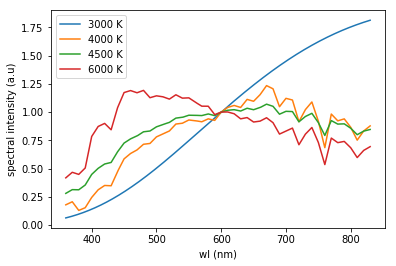

In [3]:
#----------------------------------------------------------------------------------------------------
# set CIE observer:
cieobs = '1964_10'

#----------------------------------------------------------------------------------------------------
# get BB, DL & cierf ref:
ccts = [3000,4000,4500, 6000] #define ccts
ref_types = ['BB','DL','cierf','DL'] # define reference illuminant types
REF = lx.cri_ref(ccts, ref_type = ref_types, normalization = 'lambda', w_norm = 600) # calculate reference illuminants

print("Get M = 4 BB, DL & cierf reference illuminants at ccts = [3000,4000,4500, 6000], \
      \nnormalize to 1 at wavelength = 600 and store in REF:")
print("* CODE: REF = lx.cri_ref(ccts, ref_type = ref_types, normalization = 'lambda', w_norm = 600)")
print('* REF.shape --> (M + 1 x number of wavelengths): {}'.format(REF.shape))


#----------------------------------------------------------------------------------------------------
# Get XYZ of a set of light sources only:
xyz_REF = lx.spd_to_xyz(REF,cieobs = cieobs) # direct calculation of illuminant xyz

print('\nGet XYZ of a set of light sources (REF) only, xyz_REF:')
print('* CODE: xyz_REF = lx.spd_to_xyz(REF,cieobs = cieobs)')
print('* xyz_REF.shape --> (M x 3): {}'.format(xyz_REF.shape))


#----------------------------------------------------------------------------------------------------
# Get XYZ of a set of spectral reflectance functions 'illuminated' by a set of light sources:
Munsellrfl8 = lx._CRI_RFL['cie-13.3-1995']['8'] # get 8 spectral reflectance functions used in CIE 13.3-1995

print('Get set of spectral reflectance functions:')
print("* CODE: Munsellrfl8 = lx._CRI_RFL['cie-13.3-1995']['8']")
print('* Munsellrfl8.shape: {} --> (N + 1 x number of wavelengths)'.format(Munsellrfl8.shape))

xyz_Munsell8_REF = lx.spd_to_xyz(REF,cieobs = cieobs, rfl = Munsellrfl8,relative = True) # direct calculation of illuminant xyz

print('\nXYZ of spectral refl. fcns illuminated by REF, xyz_Munsell8_REF:')
print('* xyz_Munsell8_REF.shape --> (N x M x 3): {}'.format(xyz_Munsell8_REF.shape))


#----------------------------------------------------------------------------------------------------
# Get XYZ and XYZw of a set of spectral reflectance functions 'illuminated' by a set of light sources:
xyz_Munsell8_REF_2, xyz_REF_2 = lx.spd_to_xyz(REF,cieobs = cieobs, rfl = Munsellrfl8,relative = True, out = 2) # direct calculation of illuminant xyz

print("\nXYZ and XYZw of a set of spectral reflectance functions illuminated' by a set of light sources:")
print("* CODE: xyz_Munsell8_REF_2, xyz_REF_2 = lx.spd_to_xyz(REF,cieobs = cieobs, rfl = Munsellrfl8,relative = True, out = 2)")
print('* XYZ: xyz_Munsell8_REF_2.shape --> (N x M x 3): {}'.format(xyz_Munsell8_REF_2.shape))
print('* XYZw: xyz_REF_2.shape --> (M x 3): {}'.format(xyz_REF_2.shape))


#----------------------------------------------------------------------------------------------------
print('\nSpectrum plot of reference illuminants REF, normalized to 1 at wl = 600 nm:')
plt.plot(REF[0],REF[1:].T)
plt.xlabel('wl (nm)')
plt.ylabel('spectral intensity (a.u)')
plt.legend(['{} K'.format(x) for x in ccts])
plt.show()


### colortransforms.py: xyz_to_Yuv(), ...


Calculate Yuv (CIE 1976 u'v') from xyz (identical for other transforms):
* CODE: Yuv_REF_2 = lx.xyz_to_Yuv(xyz_REF_2)
* Yuv_REF_2.shape --> (M x 3): (4, 3)
* Yuv_Munsell8_REF_2.shape --> (N x M x 3): (8, 4, 3)

plot spectrum locus (together with blackbody and daylight locus):
* CODE: axh = lx.plotSL(cspace='Yuv', cieobs = cieobs,show = False, BBL = True, DL = True)

Split Yuv in Y,u,v for plotting:
* CODE: Y, u,v = np.squeeze(lx.asplit(Yuv_REF_2))

Plot Yuv data in graph:
* CODE: lx.plot_color_data(u,v, formatstr = 'go')


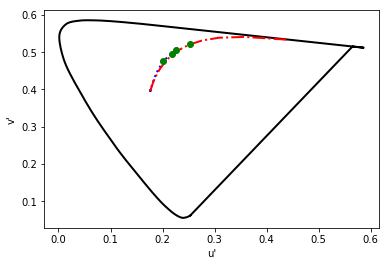

In [4]:
#----------------------------------------------------------------------------------------------------
# calculate Yuv (CIE 1976 u'v') from xyz (identical for other transforms):
Yuv_REF_2 = lx.xyz_to_Yuv(xyz_REF_2)
Yuv_Munsell8_REF_2 = lx.xyz_to_Yuv(xyz_Munsell8_REF_2)

print("\nCalculate Yuv (CIE 1976 u'v') from xyz (identical for other transforms):")
print("* CODE: Yuv_REF_2 = lx.xyz_to_Yuv(xyz_REF_2)")
print("* Yuv_REF_2.shape --> (M x 3): {}".format(Yuv_REF_2.shape))
print("* Yuv_Munsell8_REF_2.shape --> (N x M x 3): {}".format(Yuv_Munsell8_REF_2.shape))

#----------------------------------------------------------------------------------------------------
# plot spectrum locus (together with blackbody and daylight locus):
print("\nplot spectrum locus (together with blackbody and daylight locus):")
print("* CODE: axh = lx.plotSL(cspace='Yuv', cieobs = cieobs,show = False, BBL = True, DL = True)")
axh = lx.plotSL(cspace='Yuv', cieobs = cieobs,show = False, BBL = True, DL = True)

print("\nSplit Yuv in Y,u,v for plotting:")
print("* CODE: Y, u,v = np.squeeze(lx.asplit(Yuv_REF_2))")
Y, u,v = np.squeeze(lx.asplit(Yuv_REF_2)) # splits array along last axis

print("\nPlot Yuv data in graph:")
print("* CODE: lx.plot_color_data(u,v, formatstr = 'go')")
lx.plot_color_data(u,v, formatstr = 'go')


### colortf.py:  colortf()

In [5]:
#----------------------------------------------------------------------------------------------------
# use of colortf (works for any transformation that has can be mapped as ..._to_xyz() --> xyz_to_...()):

# colortf() calls xyz_to...() function that doesn't require extra parameter input:
# Yuv from xyz:
Yuv_REF = lx.colortf(xyz_REF_2, tf = 'Yuv') #start from xyz (equivalent to tf = 'xyz>Yuv')
# Yuv from spd:
Yuv_REF = lx.colortf(REF, tf = 'spd>Yuv')
print("\nYuv_REF.shape --> (Nx3):{}".format(Yuv_REF.shape))

# colortf() calls xyz_to...() function that does require extra parameter input (through tfa0 dict):
# L*a*b* (CIELAB) from xyz (using default whitepoint xyzw as set in xyz_to_lab()):
lab_REF1 = lx.colortf(xyz_REF_2, tf = 'lab') #start from xyz (equivalent to tf = 'xyz>lab')
# L*a*b* (CIELAB) from xyz (using user defined white point):
tfa_userdefined = {'xyzw' : lx.spd_to_xyz(lx._CIE_ILLUMINANTS['A'])}
lab_REF2 = lx.colortf(xyz_REF_2, tf = 'lab', tfa0 = tfa_userdefined) #start from xyz (equivalent to tf = 'xyz>lab')

print('\nlab of light sources --> shape of lab_REF1 (Nx3): {}'.format(lab_REF1.shape))
print('\nlab of light sources --> shape of lab_REF2 (Nx3): {}'.format(lab_REF2.shape))
print('\nDefault xyzw of xyz_to_lab():\n{}'.format(lab_REF1))
print('\nUser-defined xyzw (CIE illuminant A):\n{}'.format(lab_REF2))


Yuv_REF.shape --> (Nx3):(4, 3)

lab of light sources --> shape of lab_REF1 (Nx3): (4, 3)

lab of light sources --> shape of lab_REF2 (Nx3): (4, 3)

Default xyzw of xyz_to_lab():
[[100.          23.9753864   57.97069026]
 [100.           9.02919393  35.98843749]
 [100.           6.8245038   24.71169309]
 [100.           0.28154088   5.92351558]]

User-defined xyzw (CIE illuminant A):
[[100.          -0.71187661  -6.19338556]
 [100.         -14.95387458 -38.10648243]
 [100.         -17.05469005 -54.47768152]
 [100.         -23.28937924 -81.75372711]]


### cct.py: xyz_to_cct(), cct_to_xyz():

In [6]:
# calculate cct & duv of set of sources:
cct_ohno, duv_ohno = lx.xyz_to_cct(xyz_REF_2,cieobs = cieobs, out = 'cct,duv', mode = 'lut') #use Ohno's approach with Look-Up-Table
cct_search, duv_search = lx.xyz_to_cct(xyz_REF_2,cieobs = cieobs, out = 'cct,duv', mode = 'search') #use brute-force search approach

print("\nxyz_to_cct(..., mode = 'lut') (use Ohno's method):")
print('\nOhno: cct:\n{}'.format(cct_ohno))
print('\nOhno: duv:\n{}'.format(duv_ohno))
print('\nTime for xyz_to_cct_ohno() to run:')
%timeit cct_ohno, duv_ohno = lx.xyz_to_cct(xyz_REF_2,cieobs = cieobs, out = 'cct,duv', mode = 'lut') #use Ohno's approach with Look-Up-Table

print("\n\nxyz_to_cct(..., mode = 'search') (use brute force search method):")
print('\nSearch: cct:\n{}'.format(cct_search))
print('\nSearch: duv:\n{}'.format(duv_search))
print('\nTime for xyz_to_cct_search() to run:')
%timeit cct_search, duv_search = lx.xyz_to_cct(xyz_REF_2,cieobs = cieobs, out = 'cct,duv', mode = 'search') #use brute-force search approach

# calculate xyz from cct & duv:
xyz_REF_2_ohno = lx.cct_to_xyz(cct_ohno,duv = duv_ohno, cieobs = cieobs, mode = 'lut') #use Ohno's approach with Look-Up-Table
xyz_REF_2_search = lx.cct_to_xyz(cct_search, duv = duv_search, cieobs = cieobs, mode = 'search') #use brute-force search approach

print('\n\ncct_to_xyz():')
print('\nAgreement between forward (xyz_to_cct) and inverse (cct_to_xyz):')
print('\nOhno: xyzREF_2 - xyz_REF_2_ohno:\n{}'.format(xyz_REF_2 - xyz_REF_2_ohno))
print('\nSearch: xyzREF_2 - xyz_REF_2_search:\n{}'.format(xyz_REF_2 - xyz_REF_2_search))

print('\nTime for cct_to_xyz_ohno() to run:')
%timeit xyz_REF_2_ohno = lx.cct_to_xyz(cct_ohno,duv = duv_ohno, cieobs = cieobs, mode = 'lut') #use Ohno's approach with Look-Up-Table

print('\nTime for cct_to_xyz_search() to run:')
%timeit xyz_REF_2_search = lx.cct_to_xyz(cct_search, duv = duv_search, cieobs = cieobs, mode = 'search') #use brute-force search approach






xyz_to_cct(..., mode = 'lut') (use Ohno's method):

Ohno: cct:
[[2999.73320996]
 [3996.76148586]
 [4494.92213738]
 [5980.52360684]]

Ohno: duv:
[[5.04645189e-08]
 [3.08475171e-03]
 [1.67273402e-03]
 [3.45039551e-03]]

Time for xyz_to_cct_ohno() to run:
432 µs ± 28.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


xyz_to_cct(..., mode = 'search') (use brute force search method):

Search: cct:
[[2999.97339539]
 [3997.12250211]
 [4495.31152414]
 [5980.98351851]]

Search: duv:
[[-1.03160881e-06]
 [ 3.08473819e-03]
 [ 1.67265083e-03]
 [ 3.45039511e-03]]

Time for xyz_to_cct_search() to run:
46 ms ± 1.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


cct_to_xyz():

Agreement between forward (xyz_to_cct) and inverse (cct_to_xyz):

Ohno: xyzREF_2 - xyz_REF_2_ohno:
[[-4.03597141e-07  0.00000000e+00  9.28097926e-07]
 [ 8.85624033e-07  1.42108547e-14  1.73819980e-06]
 [ 1.55442534e-06 -1.42108547e-14  6.77689569e-06]
 [ 1.94541815e-06  0.00000000e+00  4.01046438e-06]]

Sea

### cam.py: 

### cri.py:

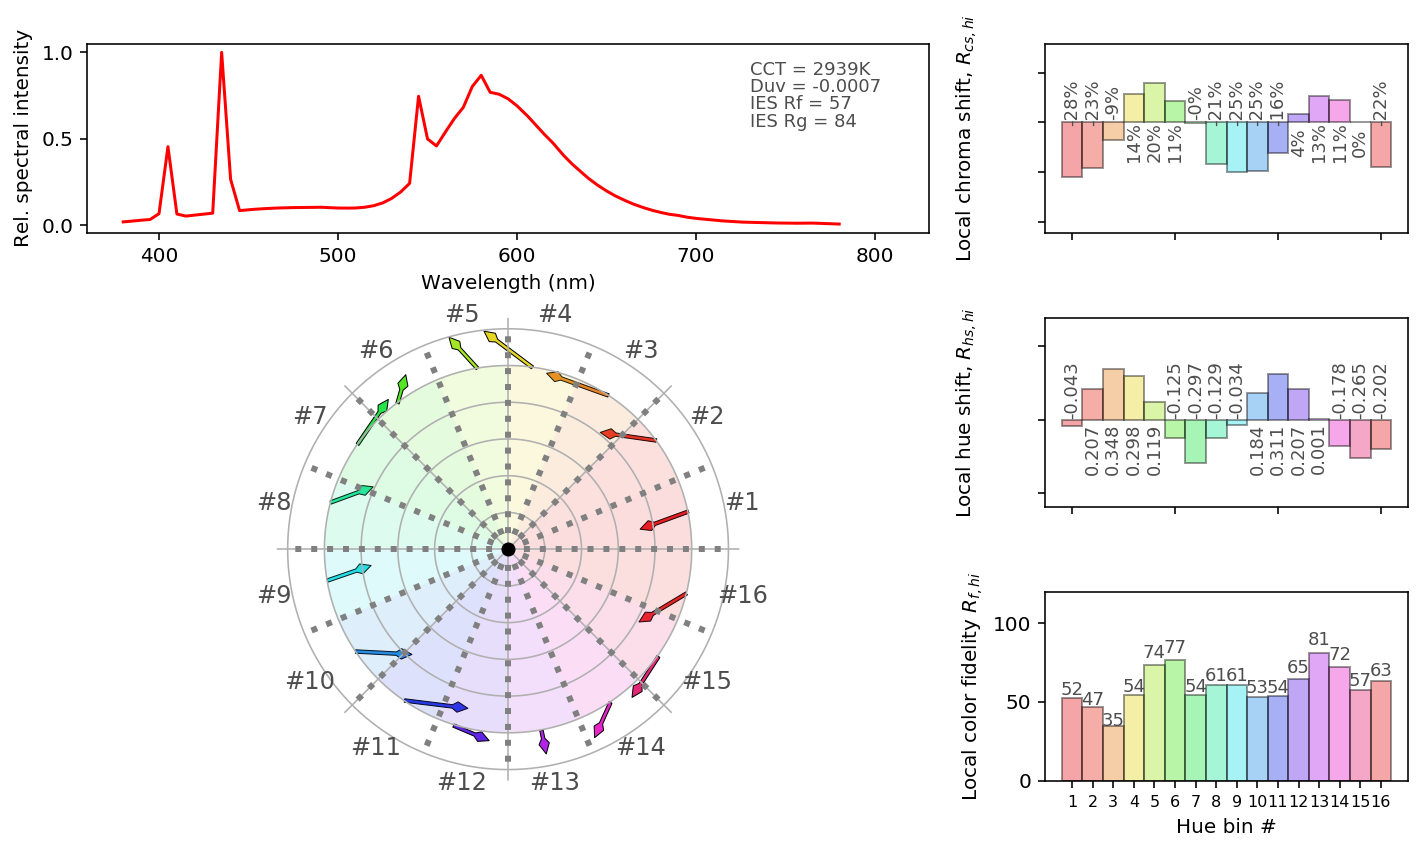

In [7]:
SPD = lx._CIE_ILLUMINANTS['F4']
data, hfig = lx.cri.plot_cri_graphics(SPD)

